<a href="https://colab.research.google.com/github/zhuan0122/Machine_Learing_Handson_Python_in_Data_science/blob/master/_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

## Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
# the same as k means here we only use two features for the 2D visuilazation. it is hard to plot multiple dimensional
dataset= pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values

## Using the dendrogram to find the optimal number of clusters

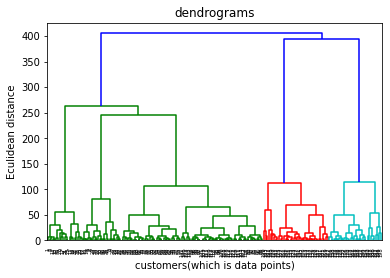

In [4]:
# here we use a function to implement dendrogram but it is not from sklearn libary, it is from another popular library called scipy
# there are three top most popular library for machine learing: sklearn, tensorflow for machine learning, scipy. 
# here we use scipy 
from scipy.cluster import hierarchy as sch
# hierachy module contains the dendrogram() function which  will return the dendrogram itself directly 
# so we need to create variable to store the function return value. 
# the linkage function from sch has two arguments, one is the data points we gonna work with and another one is the method that we gonna
# use to apply for clusters and minimize the variance between the clusters. ward means minimize the variance of clusters
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrograms')
plt.xlabel('customers(which is data points)')
plt.ylabel('Eculidean distance')
plt.show()
# well how to use the plot to define the optimal cluster number, we click the tree dots in the upright coner to view output screen and 
#save as pictures and then enlarge it to use vertical bar and mouse to find the largest vertical distance and then set threhold cross 
# the largest vertical line to define the cluster 

## Training the Hierarchical Clustering model on the dataset

In [7]:
# back to skilearn to do clustering 
from sklearn.cluster import AgglomerativeClustering
# create the object of the class agglomerativeclustering
# there is no random_state here because we just fit parameter with given from the class we could check its parameters from sklearn website
# Api
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
# the same as k means, we also need the model created here to do the future prediction. so we use fix_predict method here instead of fit
# y_hc dependent variable contains what the fit_predict returns not only train the hierrachy cluster on the data points but also returns 
# the cluster which customer belongs to 
y_hc=hc.fit_predict(X)

In [8]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters

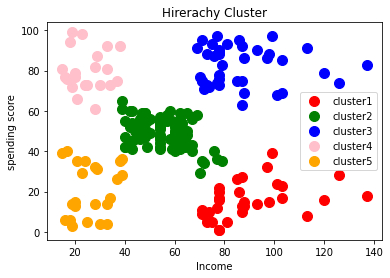

In [13]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='green',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='pink',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange',label='cluster5')
plt.title('Hirerachy Cluster')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()
# so the cluster result is the same as k MEANS WHEN WE CHOSE 5 CLUSTER. WE COULD ALSO TRY 3 CLUSTER 